In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import math as mt
from sklearn import tree

# DATA PREPROCESSING

- Handling missing values
- Removing duplicates
- Fixing data types
- Outlier handling
- Scaling / normalization
- Encoding categorical variables

### Combine train and test Data

In [2]:
train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")

print(f"data dimension #(rows,columns):{train_data.shape}")
print(f"data dimension #(rows,columns):{test_data.shape}")

df = pd.concat([train_data, test_data], ignore_index=True)

print(f"data dimension #(rows,columns):{df.shape}")
df.head()

data dimension #(rows,columns):(630000, 15)
data dimension #(rows,columns):(270000, 14)
data dimension #(rows,columns):(900000, 15)


,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [3]:
numerical_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
#remove categorical encoded from numerical cols
numerical_cols.remove("id")
numerical_cols.remove("Sex")
numerical_cols.remove("Chest pain type")
numerical_cols.remove("FBS over 120")
numerical_cols.remove("EKG results")
numerical_cols.remove("Exercise angina")
# numerical_cols.remove("Heart Disease")
numerical_cols.remove("Slope of ST")

# categorical_cols = list(df.select_dtypes(include=['object', 'category']).columns)

print(f"Numerical columns are: {numerical_cols}")
print(f"number of numerical columns is {len(numerical_cols)}")
# print(f"Categorical columns are: {categorical_cols}")


Numerical columns are: ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'Thallium']
number of numerical columns is 7


### handle missing values

In [4]:
n = df.isnull().sum() # number of missing values in dataframe
print(f"number of missing values is {n}")

number of missing values is id                              0
Age                             0
Sex                             0
Chest pain type                 0
BP                              0
Cholesterol                     0
FBS over 120                    0
EKG results                     0
Max HR                          0
Exercise angina                 0
ST depression                   0
Slope of ST                     0
Number of vessels fluro         0
Thallium                        0
Heart Disease              270000
dtype: int64


### Fixing Data type

- Binary encoding the class label : **presence** -> (0) **absence** -> (1)

In [5]:
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

df.head(3)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1.0
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0.0
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0.0


### outlier handling

Visualize outliers for **numerical attributes**

************************************************[Age]************************************************
outlier lower and upper bound of is Age is : [30 , 78]
number of outliers in Age is : 1502


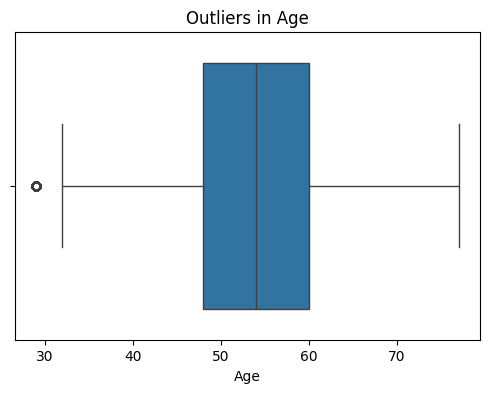

number of outliers in Age is : 0

************************************************[BP]************************************************
outlier lower and upper bound of is BP is : [90 , 170]
number of outliers in BP is : 12848


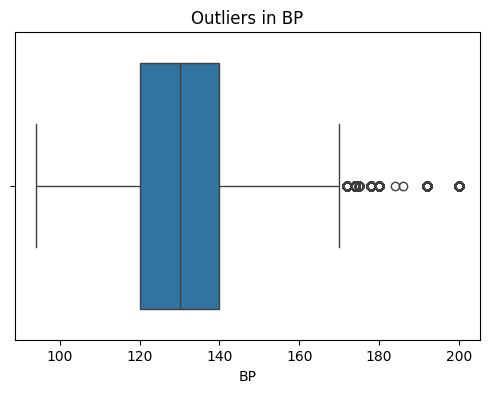

number of outliers in BP is : 0

************************************************[Cholesterol]************************************************
outlier lower and upper bound of is Cholesterol is : [154 , 338]
number of outliers in Cholesterol is : 3093


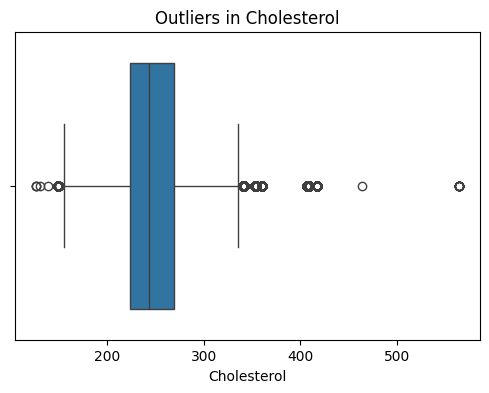

number of outliers in Cholesterol is : 0

************************************************[Max HR]************************************************
outlier lower and upper bound of is Max HR is : [106 , 202]
number of outliers in Max HR is : 20415


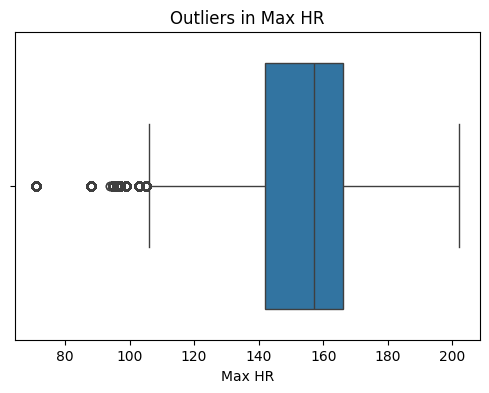

number of outliers in Max HR is : 0

************************************************[ST depression]************************************************
outlier lower and upper bound of is ST depression is : [-2 , 3]
number of outliers in ST depression is : 22964


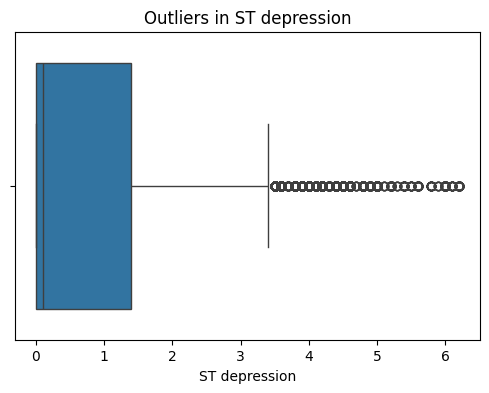

number of outliers in ST depression is : 0

************************************************[Number of vessels fluro]************************************************
outlier lower and upper bound of is Number of vessels fluro is : [-2 , 2]
number of outliers in Number of vessels fluro is : 32774


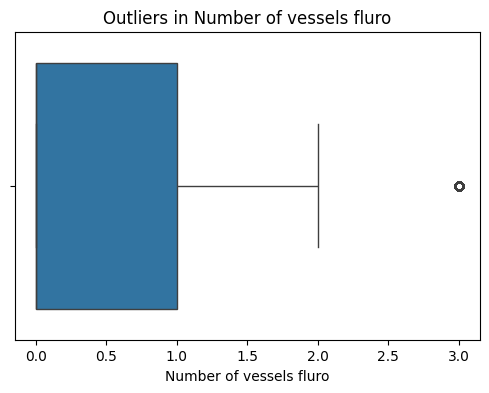

number of outliers in Number of vessels fluro is : 0

************************************************[Thallium]************************************************
outlier lower and upper bound of is Thallium is : [-3 , 13]
number of outliers in Thallium is : 0


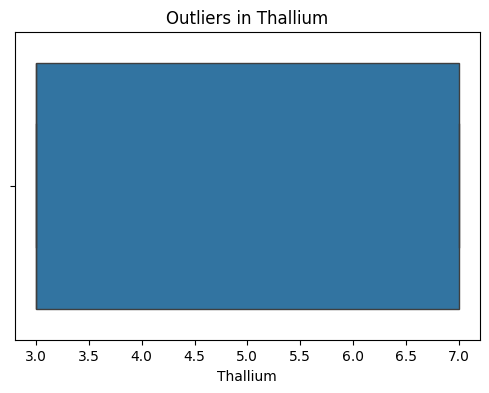

number of outliers in Thallium is : 0



In [6]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = round(Q1 - 1.5 * IQR)
    upper_bound = round(Q3 + 1.5 * IQR)
    outliers_number = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"************************************************[{col}]************************************************")
    print(f"outlier lower and upper bound of is {col} is : [{lower_bound} , {upper_bound}]")
    print(f"number of outliers in {col} is : {outliers_number}")
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()
    df[col] = df[col].clip(lower_bound, upper_bound)
    outliers_number = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"number of outliers in {col} is : {outliers_number}")
    print("")

### Fixing imballence

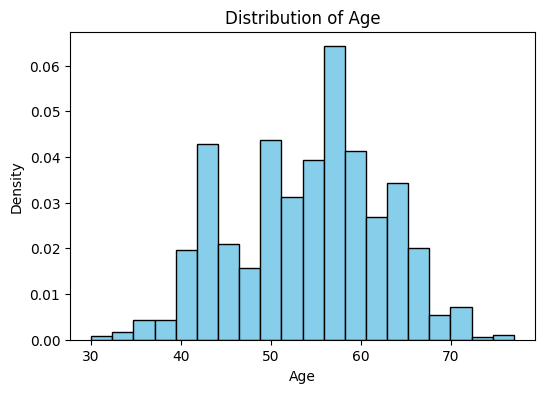

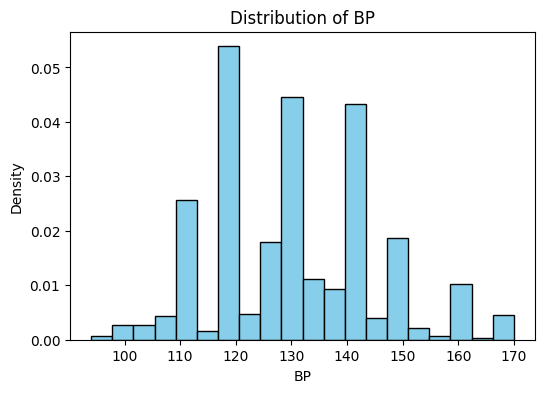

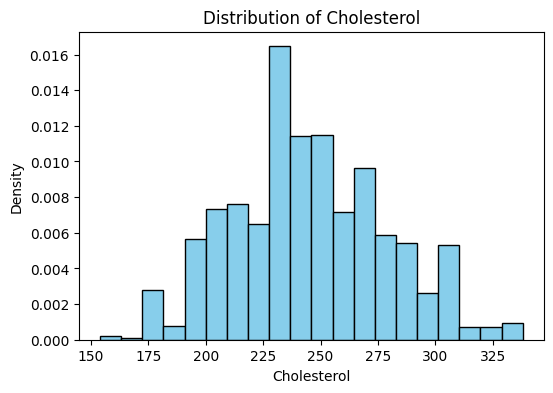

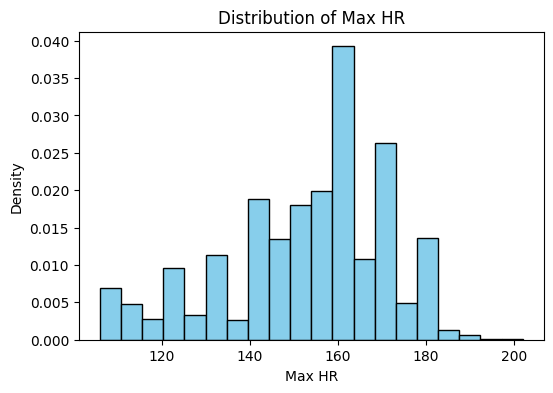

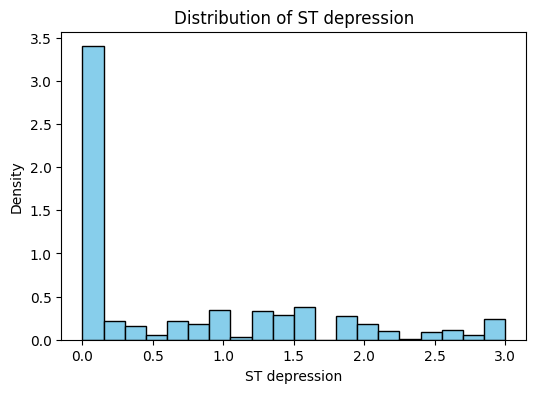

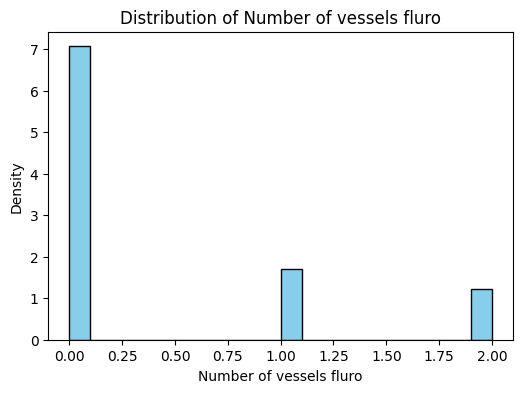

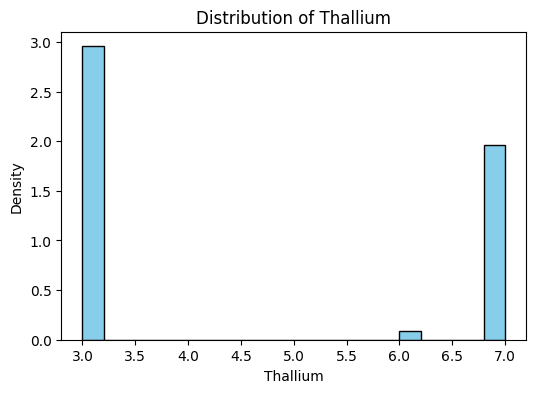

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', density=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Density")
    plt.show()

In [8]:
for col in numerical_cols:
    skew_val = df[col].skew()
    direction = "right-skewed" if skew_val > 0 else "left-skewed" if skew_val < 0 else "symmetric"
    print(f"{col}: skewness = {skew_val:.2f} ({direction})")

Age: skewness = -0.16 (left-skewed)
BP: skewness = 0.38 (right-skewed)
Cholesterol: skewness = 0.21 (right-skewed)
Max HR: skewness = -0.66 (left-skewed)
ST depression: skewness = 1.04 (right-skewed)
Number of vessels fluro: skewness = 1.38 (right-skewed)
Thallium: skewness = 0.38 (right-skewed)


In [9]:
pt = PowerTransformer(method='yeo-johnson')

In [10]:
right_skewed = ["ST depression", "Number of vessels fluro"]
for col in right_skewed:
    df[col] = np.log1p(df[col])

In [11]:
left_skewed = ["Max HR", "Age"]
for col in left_skewed:
    df[col] = np.cbrt(df[col])

In [12]:
mild_skewed = ["BP", "Cholesterol", "Thallium"]
df[mild_skewed] = pt.fit_transform(df[mild_skewed])

In [13]:
for col in numerical_cols:
    skew_val = df[col].skew()
    direction = "right-skewed" if skew_val > 0 else "left-skewed" if skew_val < 0 else "symmetric"
    print(f"{col}: skewness = {skew_val:.2f} ({direction})")

Age: skewness = -0.38 (left-skewed)
BP: skewness = 0.00 (right-skewed)
Cholesterol: skewness = -0.01 (left-skewed)
Max HR: skewness = -0.86 (left-skewed)
ST depression: skewness = 0.62 (right-skewed)
Number of vessels fluro: skewness = 1.14 (right-skewed)
Thallium: skewness = 0.37 (right-skewed)


### Scaling

In [14]:
scaler = MinMaxScaler(feature_range=(0, 5))
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
print(df[numerical_cols].describe())

                 Age             BP    Cholesterol         Max HR  \
count  900000.000000  900000.000000  900000.000000  900000.000000   
mean        2.902141       2.799372       2.740641       2.667380   
std         0.855560       0.923425       0.888915       1.002361   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.297158       2.164922       2.178413       2.134572   
50%         2.931468       2.842025       2.726921       2.917005   
75%         3.520370       3.455084       3.398478       3.362768   
max         5.000000       5.000000       5.000000       5.000000   

       ST depression  Number of vessels fluro       Thallium  
count  900000.000000            900000.000000  900000.000000  
mean        1.475467                 1.150762       2.035566  
std         1.714720                 1.854483       2.447399  
min         0.000000                 0.000000       0.000000  
25%         0.000000                 0.000000       0.000000  


# Feature Engineering

In [16]:
df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,3.328619,1,4,4.120135,2.619592,0,0,2.967362,1,5.0,2,5.0,5.0,1.0
1,1,2.725503,1,1,2.512205,4.715433,0,2,3.603482,0,0.0,1,0.0,0.0,0.0
2,2,3.132408,0,2,4.526952,1.137453,0,2,2.610280,0,0.0,1,0.0,0.0,0.0
3,3,1.844304,0,3,3.094319,2.346152,0,2,2.558374,0,2.5,2,0.0,0.0,0.0
4,4,3.328619,1,4,3.455084,2.483804,0,2,1.178035,1,5.0,2,5.0,0.0,1.0


In [17]:
variance = df[numerical_cols].var()
print(variance)

Age                        0.731984
BP                         0.852713
Cholesterol                0.790170
Max HR                     1.004728
ST depression              2.940263
Number of vessels fluro    3.439108
Thallium                   5.989760
dtype: float64


In [18]:
correlation_matrix = df[numerical_cols].corr()

print(correlation_matrix)

                              Age        BP  Cholesterol    Max HR  \
Age                      1.000000 -0.002638     0.019038 -0.097154   
BP                      -0.002638  1.000000    -0.004112  0.003981   
Cholesterol              0.019038 -0.004112     1.000000 -0.049207   
Max HR                  -0.097154  0.003981    -0.049207  1.000000   
ST depression            0.105389 -0.002737     0.045257 -0.233764   
Number of vessels fluro  0.109179 -0.002782     0.052140 -0.248195   
Thallium                 0.150566 -0.004900     0.062700 -0.303971   

                         ST depression  Number of vessels fluro  Thallium  
Age                           0.105389                 0.109179  0.150566  
BP                           -0.002737                -0.002782 -0.004900  
Cholesterol                   0.045257                 0.052140  0.062700  
Max HR                       -0.233764                -0.248195 -0.303971  
ST depression                 1.000000                 0.30

| Feature Property | Threshold Example | Action                          |
| ---------------- | ----------------- | ------------------------------- |
| Low variance     | < 0.01            | Drop it                         |
| High correlation | > 0.8 or < -0.8   | Drop one of the correlated pair |


### drop low variant data

In [19]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
selector = VarianceThreshold(threshold=0.01)
selector.fit(df[numerical_cols])
high_variance_cols = numerical_cols[selector.get_support()].to_list()  # <-- convert to list
df_high_variance = df[high_variance_cols]

print("Dropped low-variance columns:", set(numerical_cols) - set(high_variance_cols))
print(df_high_variance.head())

Dropped low-variance columns: set()
   id       Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0   0  3.328619    1                4  4.120135     2.619592             0   
1   1  2.725503    1                1  2.512205     4.715433             0   
2   2  3.132408    0                2  4.526952     1.137453             0   
3   3  1.844304    0                3  3.094319     2.346152             0   
4   4  3.328619    1                4  3.455084     2.483804             0   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            0  2.967362                1            5.0            2   
1            2  3.603482                0            0.0            1   
2            2  2.610280                0            0.0            1   
3            2  2.558374                0            2.5            2   
4            2  1.178035                1            5.0            2   

   Number of vessels fluro  Thallium  Heart Disease  
0 

### Drop highly correlated data

In [20]:
corr_matrix = df_high_variance.corr().abs() 
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))
threshold = 0.8
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
df_cleaned = df_high_variance.drop(columns=to_drop)

print("Dropped highly correlated columns:", to_drop)
print(df_cleaned.head())


Dropped highly correlated columns: []
   id       Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0   0  3.328619    1                4  4.120135     2.619592             0   
1   1  2.725503    1                1  2.512205     4.715433             0   
2   2  3.132408    0                2  4.526952     1.137453             0   
3   3  1.844304    0                3  3.094319     2.346152             0   
4   4  3.328619    1                4  3.455084     2.483804             0   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            0  2.967362                1            5.0            2   
1            2  3.603482                0            0.0            1   
2            2  2.610280                0            0.0            1   
3            2  2.558374                0            2.5            2   
4            2  1.178035                1            5.0            2   

   Number of vessels fluro  Thallium  Heart Disease  


### split again data into training and test

In [21]:
trainingData = df[df["id"] <= 630000].copy()
testingData = df[df["id"] > 630000].copy()

### splitting training data with respect to the label

In [30]:
columns = list(df.columns)
print(columns)
# columns.remove("id")
columns.remove("Heart Disease")
X = df[columns].copy()
y = train_data["Heart Disease"].copy()
print(X.shape)

['id', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']
(900000, 14)


In [33]:
X = X[X['id'] < 630000]
print(X.shape)
X.drop("id",axis=1,inplace=True)
pd.DataFrame(X).head()

(630000, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,3.328619,1,4,4.120135,2.619592,0,0,2.967362,1,5.0,2,5.0,5.0
1,2.725503,1,1,2.512205,4.715433,0,2,3.603482,0,0.0,1,0.0,0.0
2,3.132408,0,2,4.526952,1.137453,0,2,2.610280,0,0.0,1,0.0,0.0
3,1.844304,0,3,3.094319,2.346152,0,2,2.558374,0,2.5,2,0.0,0.0
4,3.328619,1,4,3.455084,2.483804,0,2,1.178035,1,5.0,2,5.0,0.0


In [34]:
pd.DataFrame(y).head()
print(y.shape)

(630000,)


# Model Training and accuracy evaluation

### we use linear Regression

In [35]:
reg = LogisticRegression().fit(X, y)
reg.score(X, y)

0.8830825396825397

### Using Random forest

In [36]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [37]:
tree_depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

print("Depths of individual trees:", tree_depths)
print("Maximum depth among all trees:", max(tree_depths))
print("Minimum depth among all trees:", min(tree_depths))
print("Average depth:", sum(tree_depths)/len(tree_depths))

Depths of individual trees: [43, 46, 45, 43, 42, 42, 43, 43, 44, 44, 43, 43, 43, 42, 41, 42, 42, 42, 46, 43, 45, 44, 42, 42, 42, 44, 43, 44, 43, 48, 44, 45, 41, 40, 44, 45, 42, 42, 43, 44, 42, 45, 42, 44, 43, 45, 44, 46, 45, 42, 46, 42, 41, 45, 41, 42, 45, 40, 42, 41, 43, 43, 41, 44, 42, 42, 41, 43, 40, 45, 43, 42, 43, 43, 43, 45, 42, 43, 43, 46, 42, 43, 40, 42, 42, 43, 45, 43, 43, 43, 43, 45, 43, 48, 43, 41, 44, 41, 39, 42, 44, 43, 40, 47, 42, 43, 46, 43, 44, 40, 42, 45, 43, 43, 42, 44, 46, 44, 45, 41, 42, 43, 42, 41, 44, 42, 43, 42, 44, 42, 44, 47, 41, 43, 44, 41, 43, 43, 44, 41, 41, 41, 41, 42, 45, 43, 43, 47, 41, 43, 41, 40, 45, 41, 41, 44, 43, 46, 42, 47, 43, 41, 42, 42, 45, 43, 43, 43, 44, 42, 41, 42, 43, 46, 46, 41, 43, 43, 45, 43, 43, 40, 45, 42, 42, 43, 43, 41, 43, 42, 42, 44, 46, 41, 41, 42, 43, 38, 42, 43]
Maximum depth among all trees: 48
Minimum depth among all trees: 38
Average depth: 42.955


#### preventing overfitting by setting tree depth limit

In [38]:
n = X.shape[0]
max_depth = round(mt.log2(n))

print(f"number of samples : {n}")
print(f"maximum tree depth : {max_depth}")

number of samples : 630000
maximum tree depth : 19


### we use decision trees

In [39]:
clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=max_depth
)

clf = clf.fit(X, y)

In [40]:
clf.score(X,y)

0.9330174603174604

# Prediction using latest model with accuracy training 0.93...

In [41]:
testingData.drop("id",axis=1,inplace=True)

In [42]:
testingData.drop("Heart Disease",axis=1,inplace=True)

In [43]:
pd.DataFrame(testingData).head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
630001,3.032547,0,2,2.164922,1.775494,0,0,3.651060,0,0.000000,1,0.0,0.0
630002,2.931468,1,4,2.164922,3.373434,0,0,2.558374,1,0.000000,2,5.0,5.0
630003,1.844304,0,3,1.568599,0.784959,0,0,3.459626,0,2.314999,1,0.0,0.0
630004,1.726831,1,1,3.337081,3.348331,0,0,3.216011,0,3.713567,2,0.0,5.0
630005,3.614650,1,4,2.842025,3.016382,0,2,1.971545,1,3.157586,2,0.0,5.0


In [ ]:
predictions = clf.predict(testingData)

In [51]:
print(f"percentage of good heart health people are : {round((len(predictions)-len(predictions[predictions=="Presence"]))*100/len(predictions))} %")
print(set(predictions))
for i in range(len(predictions)):
    if predictions[i]=="Absence":
        predictions[i] = 0
    else:
        predictions[i] = 1
print(set(predictions))

percentage of good heart health people are : 56 %
{'Absence', 'Presence'}
{0, 1}


In [52]:

print(f"percentage of good heart health people are : {round((len(predictions)-len(predictions[predictions==1]))*100/len(predictions))} %")

percentage of good heart health people are : 56 %


In [53]:
submission = pd.DataFrame({
    'id': range(630000, 630000 + len(predictions)),
    'Heart Disease': predictions
})

submission['Heart Disease'] = submission['Heart Disease'].astype(int)
submission.to_csv('heart_disease_submission.csv', index=False)

print(submission.head())

       id  Heart Disease
0  630000              0
1  630001              1
2  630002              0
3  630003              0
4  630004              1
